# Importações

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense

# MNIST c/ Conv. Net

## Configurando a rede neural



Na configuração as imagens do MNIST são preparadas através do redimensionamento para um canal (preto e branco) e normalização, variando entre 0 e 1.

A arquitetura da CNN inclui duas séries de camadas convolucionais, cada uma com normalização e ativação ReLU. As primeiras camadas convolucionais têm 64 filtros, seguidas por outras com 128 filtros. Após cada série, utiliza-se pooling para diminuir o tamanho dos dados e dropout para evitar overfitting.

A rede termina com uma camada para achatar os dados, seguida por uma camada densa e dropout, e finaliza com uma camada densa e a função softmax para classificar as 10 categorias do MNIST. O modelo é otimizado com o Adam e usa a perda 'sparse_categorical_crossentropy', ideal para classificação de múltiplas categorias.



In [ ]:
# Carregarmento e prepararação do dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Construindo uma nova arquitetura de CNN
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treinando




No treinamento do modelo, foi utilizada a validação cruzada K-Fold com 5 divisões. Isso significa dividir o conjunto de dados de treino em 5 partes, treinando e testando o modelo 5 vezes, cada uma com uma parte diferente para teste. Em cada rodada, o modelo foi treinado por 3 épocas e foi-se avaliada sua acurácia. Ao final, foi calculada a média das acurácias de todas as rodadas para entender o desempenho geral do modelo.


---



>
**ÉPOCAS(para o meu aprendizado):** As épocas são unidades de medida que representam o número de vezes que um modelo de aprendizado de máquina trabalha através de todo o conjunto de dados de treinamento. Uma única época significa que cada amostra no conjunto de dados foi usada uma vez para atualizar os parâmetros do modelo.



In [ ]:
# Preparando a validação cruzada K-Fold
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
accuracies = []

for train, val in kfold.split(train_images, train_labels):
    # Treinamento do modelo
    history = model.fit(train_images[train], train_labels[train],
                        epochs=3,
                        validation_data=(train_images[val], train_labels[val]))

    # Salvando a acurácia
    scores = model.evaluate(train_images[val], train_labels[val], verbose=0)
    print(f"Fold {fold_no}: {scores[1] * 100}%")
    accuracies.append(scores[1])
    fold_no += 1

average_accuracy = np.mean(accuracies)
print(f"Média da acurácia em {num_folds} folds: {average_accuracy * 100}%")

Epoch 1/3
1500/1500 [==============================] - 18s 8ms/step - loss: 0.2430 - accuracy: 0.9317 - val_loss: 0.0622 - val_accuracy: 0.9824
Epoch 2/3
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1108 - accuracy: 0.9700 - val_loss: 0.0462 - val_accuracy: 0.9875
Epoch 3/3
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0872 - accuracy: 0.9766 - val_loss: 0.0360 - val_accuracy: 0.9901
Fold 1: 99.00833368301392%
Epoch 1/3
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0798 - accuracy: 0.9789 - val_loss: 0.0530 - val_accuracy: 0.9867
Epoch 2/3
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0667 - accuracy: 0.9826 - val_loss: 0.0390 - val_accuracy: 0.9891
Epoch 3/3
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0552 - accuracy: 0.9849 - val_loss: 0.0429 - val_accuracy: 0.9898
Fold 2: 98.97500276565552%
Epoch 1/3
1500/1500 [==============================] - 12s 8ms/step - loss: 0.060

## Verificando o resultado

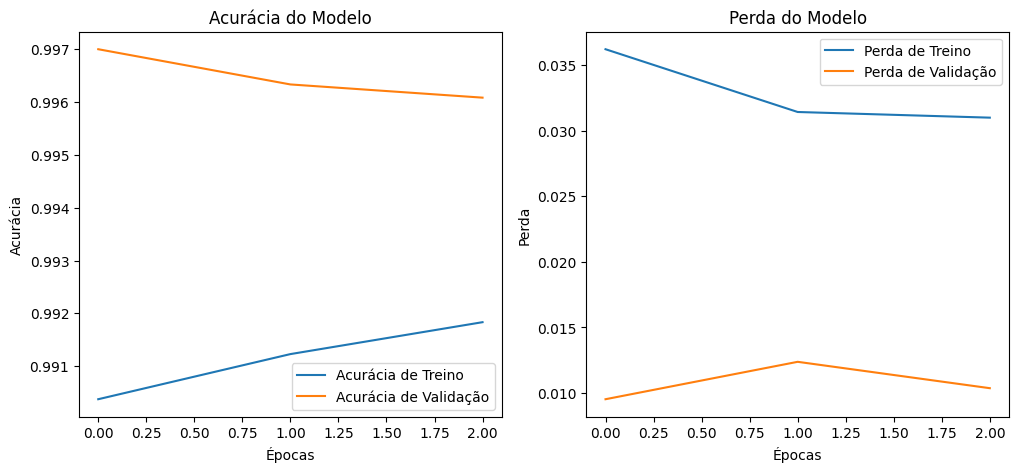

In [ ]:
# Plotando a acurácia de treinamento e validação
plt.figure(figsize=(12, 5))

# Gráfico de Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.show()

Os gráficos demonstram que após três épocas, o modelo manteve uma acurácia de validação alta e estável, sugerindo uma boa generalização. A perda em declínio e as altas acurácias de validação, acima de 99%, indicam um aprendizado efetivo e uma capacidade de prever corretamente dados novos. Isso mostra que o modelo não apenas aprendeu os dados de treino, mas também pode aplicar esse conhecimento a dados não vistos anteriormente.


---



> **Generalizar (para fins de aprendizado meu):** refere-se à capacidade de um modelo de se desempenhar bem em novos, previamente invisíveis dados, e não apenas nos dados em que foi treinado. Isso significa que um modelo bem generalizado pode fazer previsões precisas ou tomar decisões informadas sobre dados que não faziam parte do conjunto de dados de treinamento.





